Welcome. We will guide you through this notebook to make sure you find your desired museum(s) by following the steps below. Be sure to check the "read-me" file to ensure a smooth experience with the application. Enjoy! :)

Step 1: Please make sure to install the necessary libraries to avoid inconveniences. To install these libraries, simply open the terminal on your device and paste the codes that are provided in the as follows:

1- pip install geopy

2- pip install folium

3- pip install pandas

<b><font color='red' size='3px'>SETUP</font></b>

In [1]:
import ssl
from geopy import distance
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import folium
import pandas as pd
ssl._create_default_https_context = ssl._create_unverified_context

Step 2: This application was meant to retrive the location of the user and then adjust the map (in the following steps) accourdingly. However, we encounter few difficulties. Hence, we will use the defualt location of the "VU university" as a replacment. We apologies for this inconvinience. Please run the following cell to initial a few variables that are necessary for the apllication:

<b><font color='red' size='3px'>SETUP</font></b>

In [2]:
user_coor = (52.333781,4.865685)
dist = 0
added_user_to_map = False
added_accepts_cards_to_dataset = False

Step 3: The following cells contain SPARQL queries and some essential functions that are later on used for the recommendation. Make sure to run these cells before proceeding forward:

<b><font color='red' size='3px'>SPARQL</font></b>

In [3]:
%load_ext ipython_sparql_pandas

<b><font color='red' size='3px'>SPARQL</font></b>

In [4]:
%%capture cell1
%%sparql http://LAPTOP-VVBII7UP:7200/repositories/Final -s museumartist
PREFIX gp: <http://www.semanticweb.org/kandd/group76/final_project#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?Museum ?name{
    ?museum rdf:type gp:Museum ;
    		rdfs:label ?label;
    		gp:exhibitsArtFrom ?artist.
    ?artist gp:hasName ?name .
    BIND(?label AS ?Museum)
    FILTER ( !strstarts(str(?museum), "http://www.semanticweb.org/kandd/group54/ontology2") )
}ORDER BY ASC(str(?name))


<b><font color='red' size='3px'>SETUP</font></b>

In [5]:
names = []
for i in museumartist['name']:
    if i not in names:
        names.append(i)

<b><font color='red' size='3px'>SPARQL</font></b>

In [6]:
%%capture cell2
%%sparql http://LAPTOP-VVBII7UP:7200/repositories/Final -s museums
PREFIX gp: <http://www.semanticweb.org/kandd/group76/final_project#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?Museum ?PopularityRate ?styleName{
    ?museum rdf:type gp:Museum ;
    		rdfs:label ?label;
    		gp:hasPopularity ?popularity ;
    		gp:exhibitsArtFrom ?artist.
    ?artist gp:hasArtStyle ?artstyle .
    
    ?artstyle rdf:type ?artgenre .
    ?artgenre rdfs:subClassOf gp:ArtStyle.
    ?artgenre rdfs:label ?styleName.
    BIND(  ( (?popularity*5)/(?popularity+5) ) AS ?PopularityRate)
    BIND(?label AS ?Museum)
    FILTER ( !strstarts(str(?museum), "http://www.semanticweb.org/kandd/group54/ontology2") )
} ORDER BY DESC (?PopularityRate)

Step 3: Please select an option from the drop-down boxes that appear after running the following cell to personalize the result of recommendation:
- The first drop-down menu will result in a table with the names of museums that contain artworks of the "Artist" that you have selected
- The second drop-down menu will result in a table with the names of museums that contain artworks of the "Art Period" that you have selected

<b><font color='red' size='3px'>USER</font></b>

In [7]:
def draw_artists(style):
    global museumartist1
    drop = []
    for i in range(len(museumartist)):
        if str(museumartist.name[i]) != style:
            drop.append(i)
            
            
    museumartist1 = museumartist.drop(drop)
    museumartist1.unstack()
    return museumartist1.style.set_table_styles([{
                'selector': 'td',
                'props': 'font-size:1em;text-align:left',
                 },{
                'selector': 'th',
                'props': 'font-size:1em;text-align:center',
                 }]).hide_index()
    
def draw_artstyles(style):
    global _museum
    if style != 'All':
        drop = []
        for i in range(len(museums)):
            if str(museums.styleName[i]) != style:
                drop.append(i)
                
                
        museums1 = museums.drop(drop)
    else:
        museums1 = museums
    museums1 = museums1.drop(columns=['PopularityRate'])
    return museums1.style.set_table_styles([{
                'selector': 'td',
                'props': 'font-size:1em;text-align:left',
                 },{
                'selector': 'th',
                'props': 'font-size:1em;text-align:center',
                 }]).hide_index()

print("Please choose an artist:\n")
stylesbox = widgets.interact(
    draw_artists, 
    placeholder='Write the name of an artist',
    style = names,
    description='Name:',
    ensure_option=True,
    disabled=False
)
print("\n\n")
print("Please choose an art period:\n")
stylesbox = widgets.interact(
    draw_artstyles, 
    placeholder='Choose Option',
    style=['Renaissance', 'Early Modern', '20th Century', 'Modern Art', 'All'],
    description='Art period:',
    ensure_option=True,
    disabled=False
)

Please choose an artist:



interactive(children=(Dropdown(description='style', options=('Alexej von Jawlensky', 'Ben F. Laposky', 'Camill…




Please choose an art period:



interactive(children=(Dropdown(description='style', options=('Renaissance', 'Early Modern', '20th Century', 'M…

Step 4: The following cell contains a SPARQL query that is used for the recommendation based on the popularity of the museums. Make sure to run this cell before proceeding forward:

<b><font color='red' size='3px'>SPARQL</font></b>

In [8]:
%%capture cell3
%%sparql http://LAPTOP-VVBII7UP:7200/repositories/Final -s museumspopularity
PREFIX gp: <http://www.semanticweb.org/kandd/group76/final_project#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?Museum ?PopularityRate {
    ?museum rdf:type gp:Museum ;
    		rdfs:label ?label;
    		gp:hasPopularity ?popularity ;

    BIND(  ( (?popularity*5)/(?popularity+5) ) AS ?PopularityRate)
    BIND(?label AS ?Museum)
    FILTER ( !strstarts(str(?museum), "http://www.semanticweb.org/kandd/group54/ontology2") )
} ORDER BY DESC (?PopularityRate)

Step 5: The result of the following cell is a bar chart that orders museums based on their popularity. The popularity range is from 1 (star) to 5. The color green indicates the high popularity of the museum and the color red indicates the low popularity. These popularities are based on the number of visitors each museum has per year.

<b><font color='red' size='3px'>SETUP</font></b>

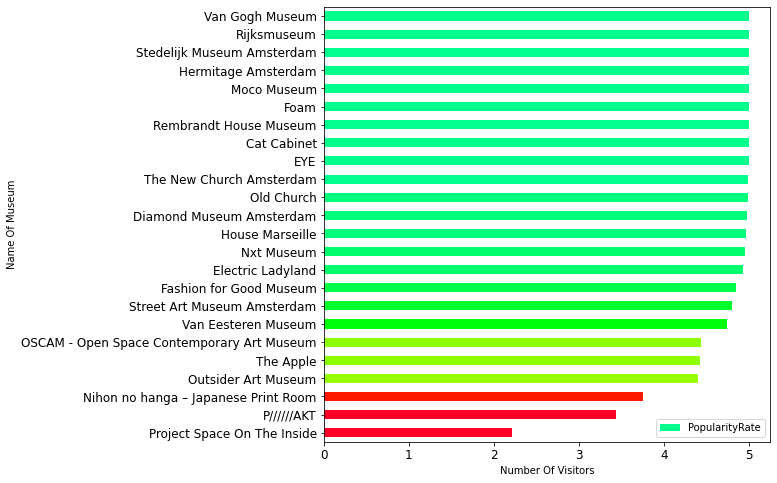

In [9]:
# Pandas visualization: https://pandas.pydata.org/docs/user_guide/visualization.html
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

s = []
t = NormalizeData(museumspopularity.PopularityRate)
for j in t:
    q = round(float(j)- 0.5, 2)
    s.append(q)
for i in range(len(museumspopularity.PopularityRate)):
    museumspopularity.PopularityRate[i] = round(float(museumspopularity.PopularityRate[i]),2)

colors = cm.gist_rainbow(np.array(s))

museumspopularity.plot(kind="barh", x ='Museum',y = 'PopularityRate', fontsize=12, figsize=(8, 8), color = colors)
plt.xlabel('Number Of Visitors')
plt.ylabel('Name Of Museum')
plt.gca().invert_yaxis()

Step 6: The following cell contains a SPARQL query that is used for the location recommendation. Make sure to run this cell before proceeding forward:

<b><font color='red' size='3px'>SPARQL</font></b>

In [10]:
%%capture cell4
%%sparql http://LAPTOP-VVBII7UP:7200/repositories/Final -s museumlocation
PREFIX gp: <http://www.semanticweb.org/kandd/group76/final_project#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT distinct?Museum ?lat ?lon {
    ?museum rdf:type gp:Museum ;
    rdfs:label ?label;
    gp:hasLong ?lon ;
    gp:hasLat ?lat .

    BIND(?label AS ?Museum)
} ORDER BY DESC (?PopularityRate)

Step 7: Please select a distance using the slider that appears after running the following cell to personalize the result of the map later on.
The distance range is calculated in kilometers and it will then aid in marking the museums that are located in the selected kilometer radious of the user's location (Which is the location of "VU university" in Amsterdam):

<b><font color='red' size='3px'>USER</font></b>

In [11]:
def return_distance(distance):
    global dist
    dist = distance

print("Please choose a distance range (km) \n")


stylesbox = widgets.interact(
    return_distance, 
    distance=(0, 25, 1),
    ensure_option=True,
    disabled=False
)
data2 = {
    'Museum':'your location',
    'lat':float(user_coor[0]),
    'lon': float(user_coor[1])
}

if not added_user_to_map:
    
    museumlocation = museumlocation.append(data2, ignore_index=True)
    distances = []
    for i in range(len(museumlocation)):
        distances.append(round(distance.geodesic(user_coor, (museumlocation.lat[i],museumlocation.lon[i])).km,1))
    added_user_to_map = True
    dist_add = pd.Series(distances, index=range(1,26))
    museumlocation['distance'] = dist_add.values


Please choose a distance range (km) 



interactive(children=(IntSlider(value=12, description='distance', max=25), Output()), _dom_classes=('widget-in…

Step 8: The result of the following cell is a map that shows the locations of museums in addition to the user's location ("VU university"). The location of the user is displayed as a blue colored circle. Based on the distance radious that you have selected in the previous step, the nearby museums are displayed as green circles and all other museums are displayed as red circles.

*Important note: You can change the distance radious by simply going back to slider in the previous step and change it to your preference. However, please keep in mind that the following cell also needs to be run again after any changes made to slider in order to update the results of the map*

<b><font color='red' size='3px'>USER</font></b>

In [19]:
middle = [museumlocation['lat'].mean(), museumlocation['lon'].mean()]
m = folium.Map(location=middle, zoom_start=12)
for _, row in museumlocation.iterrows():
    if row['Museum'] == "your location":
        marker_color = "#000dff"
        marker_fill = "#000dff"
    elif row['distance'] < dist:
        marker_color = "#00ff00"
        marker_fill = "#00ff00"
    else: 
        marker_color = "#e10000"
        marker_fill = "#e10000"
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius= 20,
        popup= row['Museum'],
        color=marker_color,
        fill=True,
        fill_color=marker_fill,
    ).add_to(m)

m

Step 9: The following cells contain SPARQL queries and some essential functions that are later on used for the recommendation. Make sure to run these cells before proceeding forward:

<b><font color='red' size='3px'>SPARQL</font></b>

In [13]:
%%capture cell5
%%sparql http://LAPTOP-VVBII7UP:7200/repositories/Final -s museumcard
PREFIX gp: <http://www.semanticweb.org/kandd/group76/final_project#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?Museum ?accepts_card {
    ?museum rdf:type gp:Museum ;
    		rdfs:label ?label;
    		gp:acceptsMuseumCard ?accepts_card ;

    BIND(?label AS ?Museum)
    FILTER ( !strstarts(str(?museum), "http://www.semanticweb.org/kandd/group54/ontology2") )
} ORDER BY ASC(str(?Museum))

<b><font color='red' size='3px'>SETUP</font></b>

In [14]:
accepts_card_values = []
accepts_card_colors = []

for i in museumcard.accepts_card:
    if i == True:
        accepts_card_values.append('Yes')
        accepts_card_colors.append('teal')
    else:
        accepts_card_values.append('No')
        accepts_card_colors.append('maroon')

<b><font color='red' size='3px'>SETUP</font></b>

In [15]:
if not added_accepts_cards_to_dataset:
    added_accepts_cards_to_dataset = True
    accepts_card_add = pd.Series(accepts_card_values, index=range(0,24))
    museumcard['boolean'] = accepts_card_add.values

Step 10: The result of the following cell is a scatter chart that displayes for each museum if they accept a museum card for entrance.
- The museums are ordered alphabatically
- The red plus signs indicates that the museums does not accept a museum card
- The green plus signs indicates that the museums does indeed accept a museum card

<b><font color='red' size='3px'>SETUP</font></b>

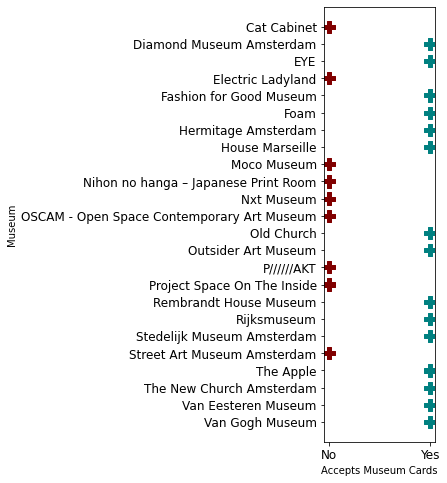

In [16]:
museumcard.plot(kind = "scatter", y ='Museum', x = 'boolean',  xticks=(['Yes','No']), fontsize=12, marker = 'P', s=150, figsize=(2, 8), color = accepts_card_colors)
plt.ylabel('Museum')
plt.xlabel('Accepts Museum Cards')
plt.gca().invert_yaxis()

Step 11: The following cell contains a SPARQL query that is later on used for the recommendation based on the museum's price range. Make sure to run this cell before proceeding forward:

<b><font color='red' size='3px'>SPARQL</font></b>

In [17]:
%%capture cell6
%%sparql http://LAPTOP-VVBII7UP:7200/repositories/Final -s museumprice
PREFIX gp: <http://www.semanticweb.org/kandd/group76/final_project#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?Museum ?price ?fee_range {
    ?museum rdf:type gp:Museum ;
    		rdfs:label ?label;
    		gp:hasAveragePrice ?price_range .
	?price_range gp:hasFee ?fee_range .
    BIND(?label AS ?Museum)
    BIND(fn:substring-after(str(?price_range), "#") AS ?price)
    FILTER ( !strstarts(str(?museum), "http://www.semanticweb.org/kandd/group54/ontology2") )
} ORDER BY ASC(str(?Museum))

Step 12: The result of the following cell is table that displayes the name of the museums, their price category (cheap, affordable and expensive) and the fee range of each category:

- The museums are ordered alphabatically
- When you hover over a cell, the cell will be highlited in cyan
- When you hover over a column's header, the header's text color will change from black to grey 
- The cell of the category "Cheap" is displayed with a green dashed-border to make it easier for the user to recognize
- The cell of the category "Affordable" is displayed with a yellow dashed-border to make it easier for the user to recognize
- The cell of the category "Expensive" is displayed with a red dashed-border to make it easier for the user to recognize

*important note: The categories and their price ranges are purely a personal modeling. It is highly possible that what we have considered expensive may not be considered as expensive for others. That is why this is considerd a modeling choice on our part.*

<b><font color='red' size='3px'>USER</font></b>

In [20]:
def border_expensive(s, props=''):
    return np.where(s == 'Expensive', props, '')

def border_affordable(s, props=''):
    return np.where(s == 'Affordable', props, '')

def border_cheap(s, props=''):
    return np.where(s == 'Cheap', props, '')
  
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': 'background-color:#c8fff1; color:black'
}
cell_not_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:not(hover)',
    'props': 'text-align: center;background-color:white; color:black'
}
headers_not_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'th:not(hover)',
    'props': 'text-align: center;background-color:white; color:black'
}
headers = {
    'selector': 'th:hover',
    'props': 'background-color:white; color:#b6b6b6;'
}


s2 = museumprice.style.apply(border_expensive, props='color:black;background-color:#f7cccc;border: 2px dashed #991c1c')\
            .apply(border_affordable, props='color:black;background-color:#f7f0cc;border: 2px dashed #c5b325')\
            .apply(border_cheap, props='color:black;background-color:#ccf7d5;border: 2px dashed #1c9936')\
            .set_caption("List of price ranges of all the art museums in Amsterdam")\
            .set_table_styles([{
                'selector': 'caption',
                'props': 'caption-side: top; font-size:1.25em;text-align: center; margin: 3vh;',
                 }, cell_not_hover,cell_hover, headers, headers_not_hover], overwrite=False).hide_index()
s2


Museum,price,fee_range
Cat Cabinet,Cheap,less than 10€
Diamond Museum Amsterdam,Cheap,less than 10€
EYE,Affordable,between 10€ and 15€
Electric Ladyland,Cheap,less than 10€
Fashion for Good Museum,Cheap,less than 10€
Foam,Affordable,between 10€ and 15€
Hermitage Amsterdam,Expensive,more than 15€
House Marseille,Cheap,less than 10€
Moco Museum,Expensive,more than 15€
Nihon no hanga – Japanese Print Room,Cheap,less than 10€


<br><br><br>
<b><font size='3px' face = "verdana">Final note:</font></b> We thank you for using our application and hope that you were able to find your desired museum and related information. If you wish to select different options and experience other results, you are welocome to go back to the first step and rerun the cells. 

<font size='4px' face = "Times New Roman">- It is highly recommended to restart your kernel and run everything from the start to avoid problems with the datasets</font>